# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Новый раздел

# 4. Домашнее задание
***

https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/download

In [1]:
import numpy as np
import pandas as pd
import math
#import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi_reg_loc = pd.read_csv("kiva_mpi_region_locations.csv")
df_loan_theme_ids = pd.read_csv("loan_theme_ids.csv")
df_loan_themes_by_reg = pd.read_csv("loan_themes_by_region.csv")

## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)

In [3]:
print('Страны, в которых преобладают мужчины: ')

group_country = df_kiva_loans[df_kiva_loans.borrower_genders.notna()]\
    .groupby('country')\
    .agg(is_male_more = ('borrower_genders',\
        lambda x: sum([i.count('male') - 2 * i.count('female') for i in list(x.values)]) > 0))
group_country[group_country.is_male_more].drop(columns=['is_male_more'])

Страны, в которых преобладают мужчины: 


""
country
Azerbaijan
Belize
China
Egypt
Kosovo
Lao People's Democratic Republic
Mauritania
Mongolia
Nigeria


In [4]:
print('Страны, в которых преобладают группы людей: ')

group_country = df_kiva_loans[df_kiva_loans.borrower_genders.notna()]\
    .groupby('country')\
    .agg(is_group_more = ('borrower_genders',\
        lambda x: sum([-1 if i == 'male' or i == 'female' else 1 for i in list(x.values)]) > 0))
group_country[group_country.is_group_more].drop(columns=['is_group_more'])

Страны, в которых преобладают группы людей: 


""
country
Benin
Brazil
Burkina Faso
Burundi
Cambodia
Chile
Congo
Dominican Republic
Ghana


#  
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)

In [36]:
df = df_kiva_loans.sort_values('funded_amount', ascending = False).head(100).copy()

def top_100_bar(column, string, rot = 0):
    plt.figure(figsize=(20,10))
    plt.title("Топ 100 займов " + string, fontsize=16)
    plt.tick_params(labelsize=14)
    plt.xticks(rotation=rot)
    sns.barplot(y=column.values, x=column.index, alpha=0.6)
    plt.show()

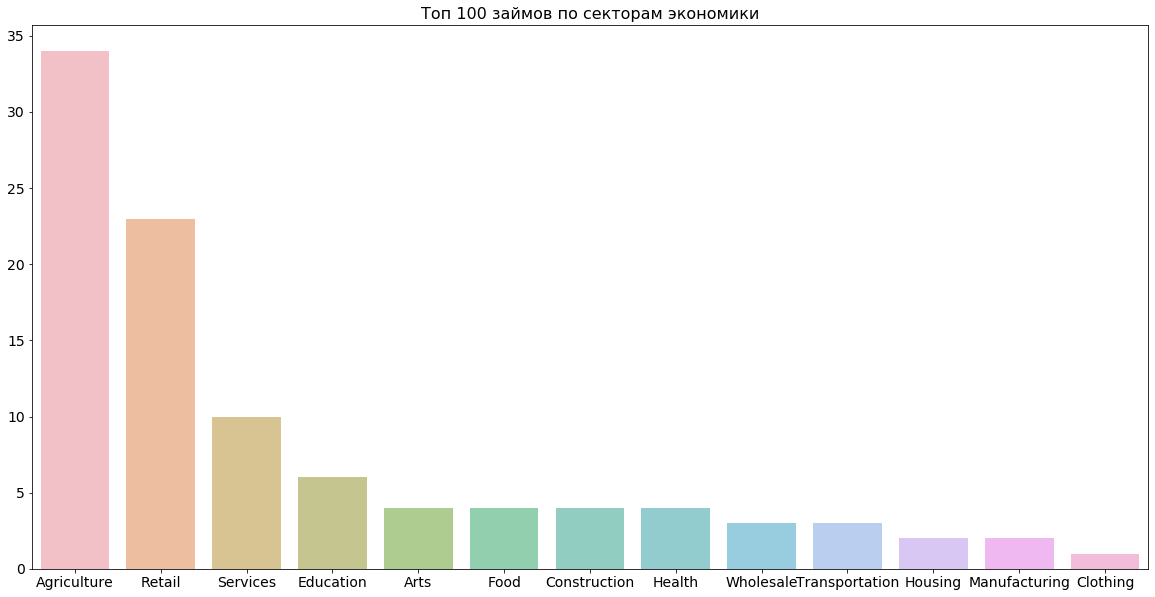

In [43]:
top_100_bar(df.sector.value_counts(), 'по секторам экономики')

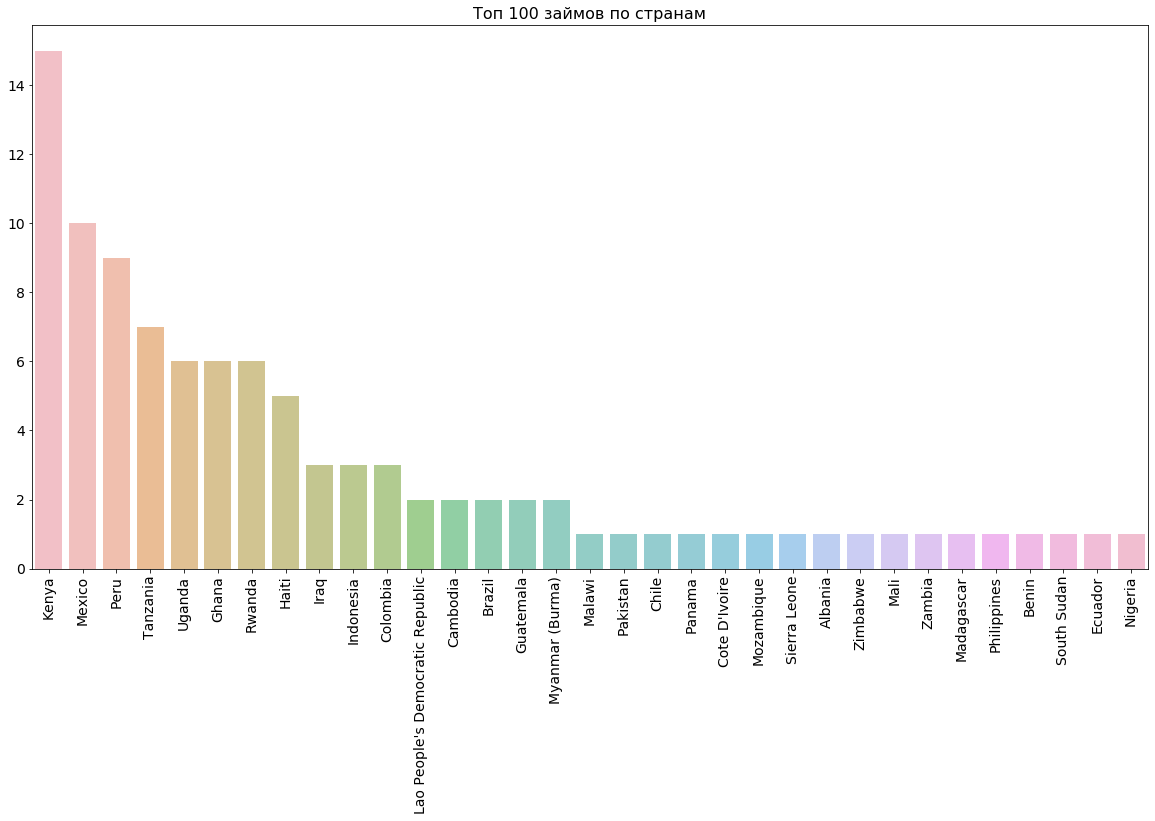

In [40]:
top_100_bar(df.country.value_counts(), 'по странам', 90)

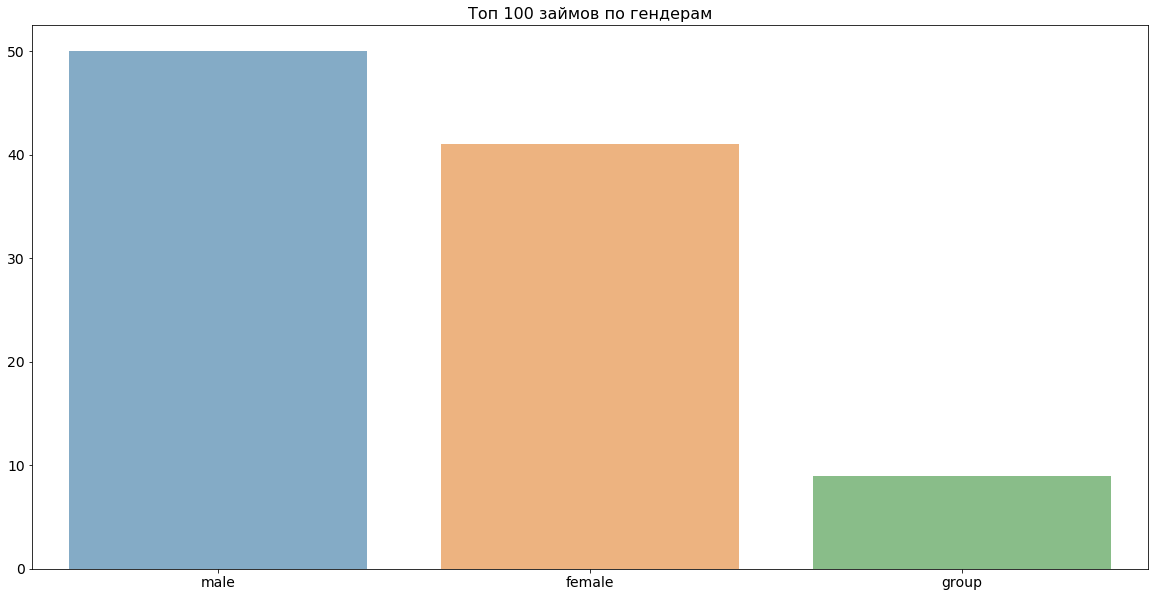

In [42]:
df['sex_type'] = [x if x in ['male', 'female'] else 'group'  for x in df.borrower_genders]
top_100_bar(df.sex_type.value_counts(), 'по гендерам')

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.